In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [9]:
signal = np.fromfile('signal.dat', dtype=float)
incompletos = np.fromfile('incompletos.dat', dtype=float)

print (signal)

[  3.84572284e-86   8.23007961e-67   2.09062091e-76 ...,   1.20098203e-71
   1.96564226e-62   6.13052481e-62]


In [4]:
#Grafica de signal e incompletos
plt.figure(figsize=(8,5))
plt.plot(signal,'k.')
plt.xlabel('t [AU]')
plt.ylabel('x(t) [AU]')
plt.savefig('GomezMaria_signal.pdf')

In [5]:
#Transformada de Fourier
def fourier(x):
    N = len(x)
    expo = np.exp(-2*np.pi*1j/N)
    expos = np.asarray([np.power(expo,k) for k in range(N)])
    F = np.zeros(N, dtype = complex)
    for m in range(N):
        F[m] = np.dot(np.power(expos,m),x)
    return F

In [6]:
#Magnitud de la transformada de fourier de los datos
RF = abs(fourier(signal))
#las frecuencias son fn = n*F/N, con F la frecuencia a la que fueron muestreados los datos. Asumimos F = 1 ya que no la
#conocemos. Incluimos frecuencias negativas cons los mismos valores.
frecuenciasPositivas = np.asarray([n/len(signal) for n in range(int(len(signal)/2))])
frecuenciasNegativas = np.asarray([(-int(len(signal)/2) + n)/len(signal) for n in range(int(len(signal)/2))])
frecuencias = np.concatenate((frecuenciasPositivas, frecuenciasNegativas),axis=0)

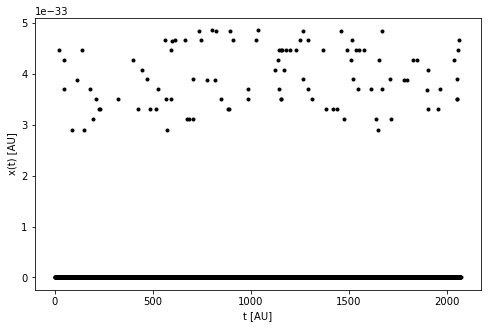

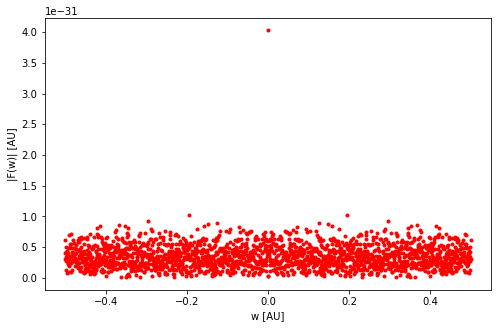

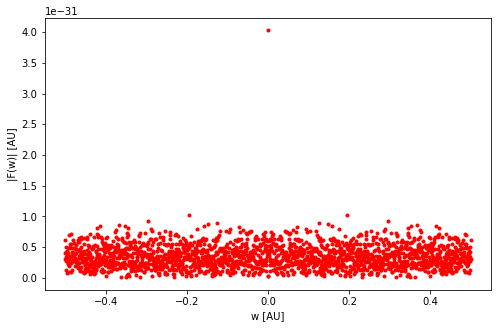

In [8]:
plt.figure(figsize=(8,5))
plt.plot(frecuencias,RF,'r.')
plt.xlabel('w [AU]')
plt.ylabel('|F(w)| [AU]')
plt.savefig('GomezMaria_TF.pdf')
plt.show()
#plt.close()

In [5]:
#Encontrar las frecuencias principales. Solo analizar la mitad de la señal.
RF_Importantes = RF[0:int(len(signal)/2)-1]
Frec_Importantes = frecuencias[0:int(len(signal)/2)-1]
MagnitudesOrdenadas = np.sort(RF_Importantes)
MagnitudesOrdenadas = MagnitudesOrdenadas[::-1]
lasPrimerasMagnitudes = MagnitudesOrdenadas[0:10].tolist()
lasPrimerasFrecuencias_indx = [(RF_Importantes.tolist()).index(i) for i in lasPrimerasMagnitudes]
lasPrimerasFrecuencias = [Frec_Importantes[i] for i in lasPrimerasFrecuencias_indx]

In [6]:
# Estas son las primeras 11 frecuencias principales.
lasPrimerasFrecuencias

[0.0,
 0.19498069498069498,
 0.29440154440154442,
 0.12644787644787644,
 0.14720077220077221,
 0.36679536679536678,
 0.41457528957528955,
 0.15830115830115829,
 0.35231660231660233,
 0.071428571428571425]

In [10]:
max(np.fft.fftfreq(len(signal)))

0.49951737451737455

# PCA

In [18]:
signal = np.loadtxt('WDBC.dat', dtype=str, delimiter=',')

In [20]:
signal.shape

(569, 32)

In [33]:
#Convertir M/B a 1/0
Diagnosis = signal[:,1]
BinaryDiagnosis = np.zeros(Diagnosis.shape,dtype = float)
BinaryDiagnosis[Diagnosis == 'M'] = 0
BinaryDiagnosis[Diagnosis == 'B'] = 1
signal[:,1] = BinaryDiagnosis
signal = signal.astype(np.float)

In [40]:
def covarianza(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    c = np.sum([(mean_x - x[i])*(mean_y - y[i]) for i in range(len(x))])
    return c/len(x)

In [42]:
#Calcular la matriz de covarianza.
Covarianza = np.zeros((31,31),dtype = float)
for i in range(31):
    for j in range(31):
        Covarianza[i,j] = covarianza(signal[:,i+1],signal[:,j+1])

In [49]:
#Las columnas de vectors son los vectores propios.
values, vectors = LA.eig(Covarianza)